In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import networkx as nx
from konlpy.tag import Hannanum

hannanum = Hannanum()
dataset = []
with open('news.csv', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]', '', line)))
print(dataset)

[['약수터', '길'], ['구호품', '제품', '구호금', '검증', '곳'], ['부', '공사', '불법', '것', '축', '도시', '멀쩡'], ['일부', '지역', '구조', '종료', '생존자', '지원', '방향', '전환'], ['튀르키예', '대지진', '한국', '지하수', '출렁'], ['유니세프', '튀르키예', '시리아', '지진', '아동', '만명', '이상'], ['일동안', '딸', '튀르키예', '아버지', '사연'], ['시간', '만', '명', '생환', '속', '구조', '사실상', '마무리'], ['튀르키예', '지진', '발생', '시간', '만', '명', '기적', '생환', '대', '소년', '명', '대', '남성', '명'], ['잔해', '속', '시간', '지진', '생존자', '구조곳곳', '수색', '종료'], ['울산', '남구', '신정동', '통장회', '튀르키예', '시리아', '지진', '피해복구', '성금', '전달'], ['KBS충주방송국', '월', '시청자위원회'], ['지진', '참사', '온정', '손길'], ['지진', '튀르키예', '시리아'], ['킨텍스', '튀르키예', '시리아', '지진피해', '복구', '천만원', '기부'], ['이걸', '튀르키예', '보내라고요구호품', '속', '폐기물'], ['인천환경공단', '튀르키예', '시리아', '지진', '복구지원'], ['튀르키예', '지진', '충격', '천km', '밖', '한국', '지하수', '수위'], ['시리', '반군지역', '구호단체', '하얀헬멧', '생존자', '수색', '종료'], ['튀르키예', '강진', '우리나라', '지하수', '수위', '영향'], ['구호품', '제품', '구호금', '검증', '곳'], ['지진', '약탈', '기승구조작업', '위협'], ['관광', '한강', '열기구'], ['튀르키예', '힘', '보태', '온정', '한가득'], ['튀르키예', '강진'

In [3]:
from apyori import apriori

result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda item: len(item))
df = df[(df['length'] == 2) & (df['support'] >= 0.01)].sort_values(by='support', ascending=False)
df

,items,support,ordered_statistics,length
137,"(튀르키예, 지진)",0.129711,"[((), (튀르키예, 지진), 0.12971091266838203, 1.0), (...",2
131,"(시리아, 튀르키예)",0.093386,"[((), (시리아, 튀르키예), 0.0933858029362797, 1.0), (...",2
78,"(강진, 튀르키예)",0.086726,"[((), (강진, 튀르키예), 0.08672619948539428, 1.0), (...",2
136,"(튀르키예, 지원)",0.069623,"[((), (튀르키예, 지원), 0.06962312698652943, 1.0), (...",2
114,"(튀르키예, 명)",0.062661,"[((), (튀르키예, 명), 0.0626608142878765, 1.0), ((명...",2
...,...,...,...,...
92,"(긴급, 튀르키예)",0.010443,"[((), (긴급, 튀르키예), 0.010443469047979416, 1.0), ...",2
139,"(튀르키예, 파견)",0.010443,"[((), (튀르키예, 파견), 0.010443469047979416, 1.0), ...",2
72,"(강진, 규모)",0.010443,"[((), (강진, 규모), 0.010443469047979416, 1.0), ((...",2
113,"(추, 명)",0.010141,"[((), (추, 명), 0.010140759800211896, 1.0), ((명)...",2


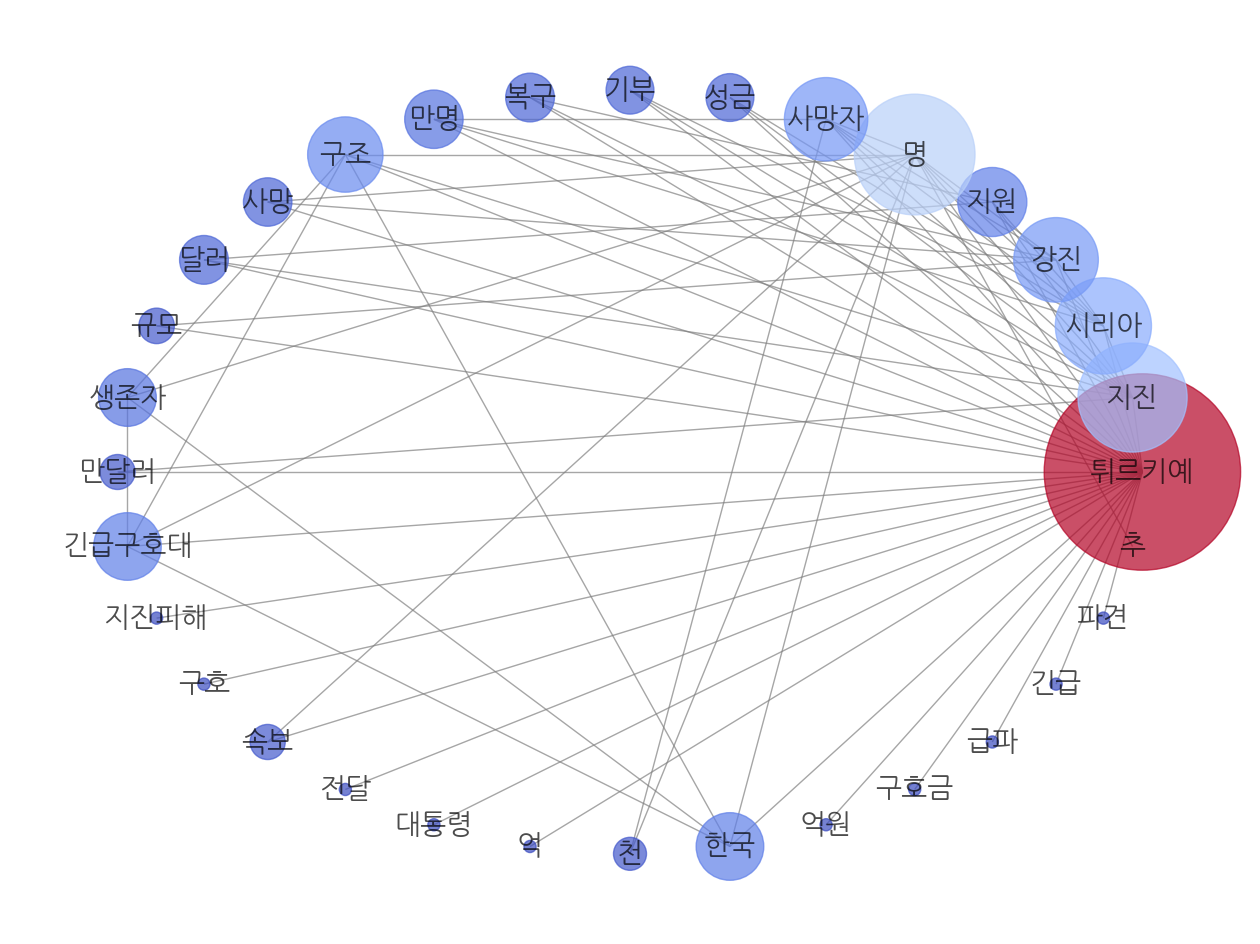

In [7]:
import numpy as np

graph = nx.Graph()
ar = df['items']
graph.add_edges_from(ar)
pr = nx.pagerank(graph)

nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))
pos = nx.circular_layout(graph)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(graph, font_family='NanumGothic', font_size=20, pos=pos, node_color=list(pr.values()), node_size=nsize * 10, alpha=0.7, edge_color='.5', cmap=plt.cm.coolwarm)
plt.savefig('img.png', bbox_inches='tight')
plt.show()